# Playstation Video Game Sales
### <span style="color:#83898b">*An analysis on major Playstation game releases and their sales to understand their business tactics*</span>
<span style="color:#83898b">Heisn Nithysingha: 100817036</span>

From the brand name Sony, the Playstation console line is very famous in the video game industry. Their Playstation consoles have been top contenders in the market used by many people across all ages and races. While looking into datasets for this assignment, I stumbled upon this dataset on video game sales in the past years and I knew I had something. It piqued my interest since I wanted to find out if the business side of the brand has any involvement in its rise to fame. In this assignment, I analyse all the sales and genre demographics to see how well each console did in its prime and how each business tactic helped each console's sales.

## Methods

### Data Collection

This data set was retrieved from [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download). It holds all video games which have sold over 100,000 copies, in this analysis such games will be defined as 'popular games'. It was generated by a scrape of vgchartz.com.

 This description was given on the site to describe each column:
 * Rank - Ranking of overall sales (This column was no use so I dropped it)
 * Name - The games name
 * Platform - Platform of the games release (i.e. PC,PS4, etc.)
 * Year - Year of the game's release
 * Genre - Genre of the game
 * Publisher - Publisher of the game (This column was no use so I dropped it)
 * NA_Sales,EU_Sales,JP_Sales - Sales in North america, Europe and Japan (in millions)
 * Other_Sales - Sales in the rest of the world (This column was no use so I dropped it)

In [6]:
#load libraries necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns


In [7]:
games = pd.read_csv("https://drive.google.com/u/0/uc?id=1dt_jan1m4Oik-YwB1GQ9Tv1PD0GZPeIp&export=download")
#Download link from website didnt work used a google drive link to load, refer to website above for location of file and credits.

### Data Cleaning

This Dataset consists of all Video Game Platforms, however, I just want to analyse all games for each generation of Playstation. I grouped all seperate consoles in different DataFrames. There are no missing values therefore no need to drop values.

In [8]:
#Drop columns not being used
games.drop(['Rank','Publisher','Other_Sales'],axis = 1)

#Extract all Playstation variants out into seperate data frames
PS1 = games[games['Platform'] == 'PS']
PS2 = games[games['Platform'] == 'PS2']
PS3 = games[games['Platform'] == 'PS3']
Playstations = [PS1,PS2,PS3]

## Analyses
I am going to inspect any correlations between the lifetime, genre and sales across each console. I started by looking for correlations in the lifetime of each console.

### Console Lifetime

I compared when the first popular game was published to when the last popular game was published to establish a console timeline in which the console was promoted for (Lifetime).

In [9]:
#Used a for loop to show the years each console was in their lifetime (Still producing popular games)
count = 1
for PS in Playstations:
    print("Playstation", count,":")
    print(f" PS{count} Lifetime: {round(PS['Year'].describe()['min'],2)} - {round(PS['Year'].describe()['max'],0)}")
    count +=1

Playstation 1 :
 PS1 Lifetime: 1994.0 - 2003.0
Playstation 2 :
 PS2 Lifetime: 2000.0 - 2011.0
Playstation 3 :
 PS3 Lifetime: 2006.0 - 2016.0


Seems to be an overlap in the years popular games were produced for each console. I decided to plot the sales of all playstation consoles to see any correlations in the overlapping regions.

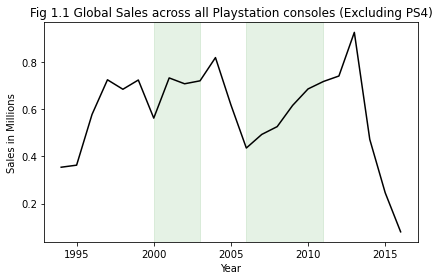

In [10]:
#Created x to be each year and concatenated all the console dataframes to get a general Global sale average across 
#all consoles(this is the y val)

x = np.arange(1994,2017,1)
All = pd.concat([PS1,PS2,PS3])
y = All['Global_Sales'].groupby([All['Year']]).mean()

#Plotted line graph
pl.plot(x,y,color = 'black')
pl.axvspan(2000, 2003, color='green', alpha=0.1)
pl.axvspan(2006, 2011, color='green', alpha=0.1)
pl.title('Fig 1.1 Global Sales across all Playstation consoles (Excluding PS4)')
pl.ylabel("Sales in Millions")
pl.xlabel('Year')

pl.tight_layout()
pl.show()


In each highlighted region (which is the overlapped console lifetimes) we can see a positive correlation meaning that sales have increased when two consoles' lifetimes overlap.

This can be futher examined through each region.

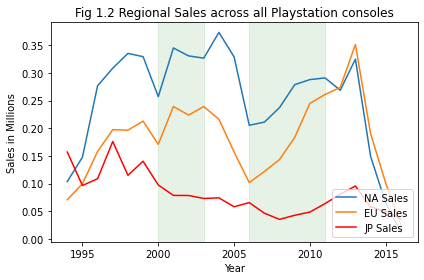

In [11]:
x = np.arange(1994,2017,1)
All = pd.concat([PS1,PS2,PS3])
y1 = All['NA_Sales'].groupby([All['Year']]).mean()
y2 = All['EU_Sales'].groupby([All['Year']]).mean()
y3 = All['JP_Sales'].groupby([All['Year']]).mean()

#Plotted line graph
pl.plot(x,y1)
pl.plot(x,y2)
pl.plot(x,y3,color = 'red')
pl.axvspan(2000, 2003, color='green', alpha=0.1)
pl.axvspan(2006, 2011, color='green', alpha=0.1)
pl.title('Fig 1.2 Regional Sales across all Playstation consoles')
pl.ylabel("Sales in Millions")
pl.xlabel('Year')
pl.legend(['NA Sales', 'EU Sales','JP Sales'], loc=4)

pl.tight_layout()
pl.show()

This shows that Japanese sales are very low compared to Europe and North America.  North America and Europe have a similar trend. There might be some correlation between demographic and sales.

### Correlation in the Amount of Popular Games in each Genre

I started by organizing how many games were produced for every genre for the three consoles. I wanted to see what genres were popular in each console.

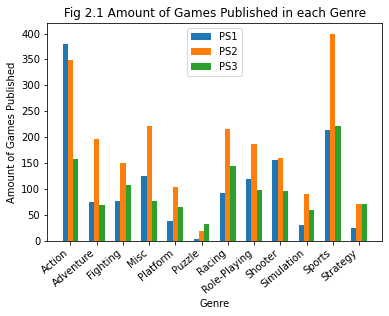

In [14]:
#Grouped each Console Dataframe to the amount in Genre
y1 = PS1.groupby(['Genre']).size()
y2 = PS2.groupby(['Genre']).size()
y3 = PS3.groupby(['Genre']).size()

#Necessary list to organize the Genres(X-value list and int value)
x = sorted(games["Genre"].unique().tolist())
X_axis = np.arange(len(x))

#Plot Graph
pl.bar(X_axis-0.2, y3, width=0.2,label='PS1')
pl.bar(X_axis, y2, width=0.2,label='PS2')
pl.bar(X_axis+0.2, y1, width=0.2,label='PS3')
pl.xticks(rotation=40, ha="right")
pl.xticks(X_axis, x)
pl.ylabel("Amount of Games Published")
pl.xlabel('Genre')
pl.title("Fig 2.1 Amount of Games Published in each Genre")
pl.legend()

pl.show()

The amount of games published for the Ps2 seems inflated in each genre therefore I decided to further pursue why.

I rearranged the graph to show how many popular games were published for each console to see how popular the Ps2 was compared to its other generations.

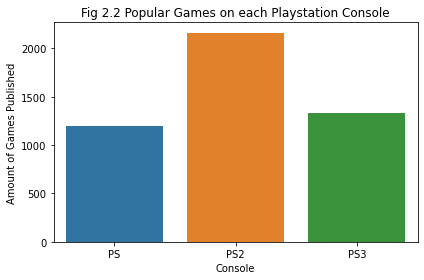

In [15]:
ax = sns.countplot(x="Platform", data=All)
pl.ylabel("Amount of Games Published")
pl.xlabel('Console')
ax.set_title("Fig 2.2 Popular Games on each Playstation Console")
pl.tight_layout()
pl.show()

Above figure shows that the Ps2 games has the most games published out of the three consoles.

## Discussion 

   This assignment allowed me to research one of my favourite brands Sony, and its entertainment products; the three iterations of Playstation gaming consoles. Additionally, I was able to learn about how certain business tactics can aid in an increase in sales over time. To illustrate, Figure 1 displays the average Global sales from the consoles’ games which shows an increase in the overlapping console regions, which are green in the graph. This demonstrates how the company was able to increase its sales by implementing backwards compatibility to its gaming consoles. I discovered that the newer consoles had this new feature; they could still run games published for the previous consoles. Additionally, having a newer console out and still creating the same popular games for the older console would make sense since it helps the transition to the idea of a new console. For the business, it provides a broader consumer group; people who own the older console and people who own the new console. Eventually, we can see no games being made for older generations. This can be explained as newer games need better hardware capabilities and would not be able to run on these older consoles. Looking at the line graph, we can see that this business tactic used by the company correlates with the increase in sales. Looking at Figure 2.2, we can see that throughout the Playstation line of consoles, Japan’s sales are low while the North American and European sales seem to have a similar trend. Further research shows that in Japan, Nintendo is considered the ‘norm’, whereas the PlayStation does not have the same demand and popularity in that region.

   When I analyzed the number of games published in each genre for each console by organizing them in a bar graph, (Fig 2.1), it is evident that the amount of games published for the PS2 were inflated. Looking into why the PS2 has inflated sales, it was largely due to the fact that during this time, the PS2 had a built in DVD player and was a cheaper option in comparison to a normal DVD player and because it became so popular, many game developers tried to take advantage of it. This explains why the DVD player was a good addition to the new game console as it helped increase its popularity and helped beat its competition. Using Figure 2.2, we can see that the PS2 had the most amount of games that were popular in comparison to the PS1 and PS3. This graph explains that the PS2 has the most games as it overlaps with the PS1 and PS3 giving it the longest possible lifetime to gain sales which supports why is was so popular in its time.


## References
1. Source data - https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download
2. Numpy for data manipulation
3. Pandas for data manipulation
4. Seaborn for data visualization
5. Matplotlib for data visualization


